In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [71]:
diabetic_data_pd =  pd.read_csv('/Users/tessa/OneDrive/Desktop/Downloads/diabetic_data.csv')
#reading diabetic data file


In [72]:
k_clust_data = diabetic_data_pd[['time_in_hospital','num_lab_procedures','num_procedures']].copy()
# I selected the columns I wanted to work with for this project and made a copy

scaler = StandardScaler()
# I used the standard scaler from sklearn to transform the values which subtracts the mean and divides by the standard deviation. 

In [73]:
k_clust_data[['Tr_time_in_hospital','Tr_num_lab_procedures','Tr_num_procedures']] = scaler.fit_transform(k_clust_data[['time_in_hospital','num_lab_procedures','num_procedures']])
k_clust_data

#Transforming the data to be standardized and appended onto the dataframe. 

,time_in_hospital,num_lab_procedures,num_procedures,Tr_time_in_hospital,Tr_num_lab_procedures,Tr_num_procedures
0,1,41,0,-1.137649,-0.106517,-0.785398
1,3,59,0,-0.467653,0.808384,-0.785398
2,2,11,5,-0.802651,-1.631351,2.145781
3,2,44,1,-0.802651,0.045967,-0.199162
4,1,51,0,-1.137649,0.401761,-0.785398
...,...,...,...,...,...,...
101761,3,51,0,-0.467653,0.401761,-0.785398
101762,5,33,3,0.202343,-0.513139,0.973309
101763,1,53,0,-1.137649,0.503417,-0.785398
101764,10,45,2,1.877333,0.096794,0.387074


In [74]:
def optimise_k_means(data,max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    diabetes_fig =plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

# I found this code in a video for k-means clustering https://www.youtube.com/watch?v=iNlZ3IU5Ffw by Andy McDonald retrieved on 12/5/2022
# This function is used to find the optimum number of clusters and generates the elbow plot.

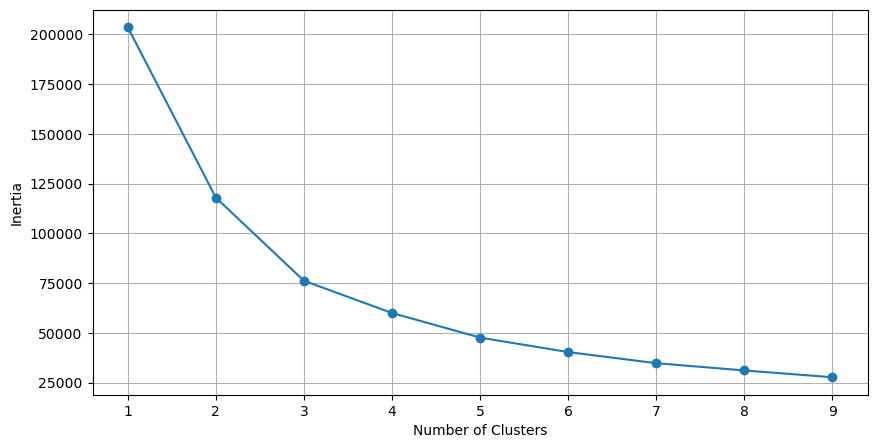

In [75]:
optimise_k_means(k_clust_data[['Tr_time_in_hospital','Tr_num_lab_procedures']],10)
#Here I created an elbow plot with the transformed data and used two variables: time in hospital and number of lab procedures

In [76]:
Time_lab_means = KMeans(n_clusters=5)
Time_lab_means.fit(k_clust_data[['Tr_time_in_hospital','Tr_num_lab_procedures']])
# I decided on 5 clusters because the line was becoming more gradual at that point, and the inertia between points looked better
# inertia being the sum of square differences between cluster center and data points

k_clust_data['kmeans_5'] = Time_lab_means.labels_
k_clust_data
# Printing the data to show that the kmeans_5 has been appended to the dataset and shows what cluster each row falls in.

,time_in_hospital,num_lab_procedures,num_procedures,Tr_time_in_hospital,Tr_num_lab_procedures,Tr_num_procedures,kmeans_5
0,1,41,0,-1.137649,-0.106517,-0.785398,1
1,3,59,0,-0.467653,0.808384,-0.785398,0
2,2,11,5,-0.802651,-1.631351,2.145781,4
3,2,44,1,-0.802651,0.045967,-0.199162,1
4,1,51,0,-1.137649,0.401761,-0.785398,1
...,...,...,...,...,...,...,...
101761,3,51,0,-0.467653,0.401761,-0.785398,1
101762,5,33,3,0.202343,-0.513139,0.973309,3
101763,1,53,0,-1.137649,0.503417,-0.785398,1
101764,10,45,2,1.877333,0.096794,0.387074,2


Text(0, 0.5, 'Tr_time_in_hospital')

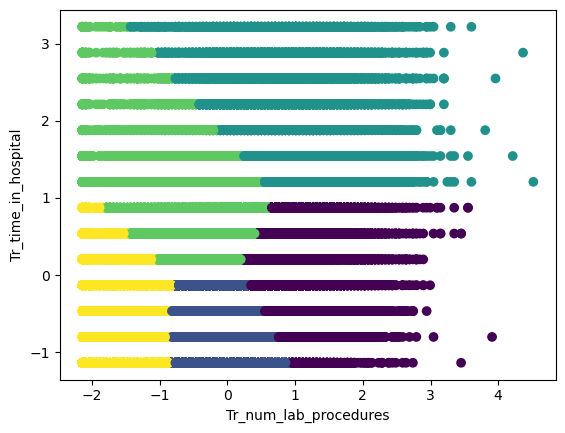

In [83]:
plt.scatter(x=k_clust_data['Tr_num_lab_procedures'],y=k_clust_data['Tr_time_in_hospital'], c=k_clust_data['kmeans_5'])
plt.xlabel('Tr_num_lab_procedures')
plt.ylabel('Tr_time_in_hospital')

# Here we are able to visualize that patients who spend more time in the hospital are more likely to have lab procedures performed.
# The clusters are differentiated by means of low time in hospital and low amount of labs, 
# medium amount of labs with low time in hospital, high time in hospital with low amount of labs, 
# high amount of labs with low time spent in hospital, 
# and a high amount of labs along with a high amount of time spent in the hospital.

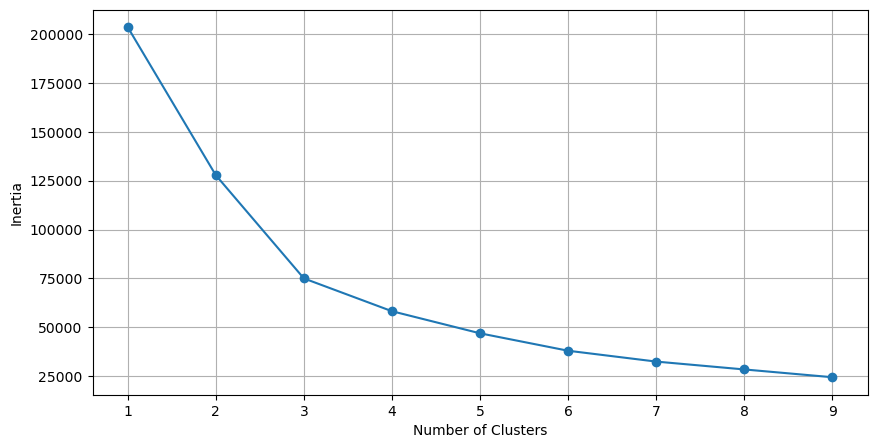

In [78]:
optimise_k_means(k_clust_data[['Tr_num_lab_procedures','Tr_num_procedures']],10)
#Here I am experimenting with different columns in the dataset

In [80]:
lab_proc_means = KMeans(n_clusters=5)
lab_proc_means.fit(k_clust_data[['Tr_num_lab_procedures','Tr_num_procedures']])

k_clust_data['kmeans5'] = lab_proc_means.labels_
k_clust_data

#Repeating steps I took above. I found that 5 clusters was also appropriate for this plot.

,time_in_hospital,num_lab_procedures,num_procedures,Tr_time_in_hospital,Tr_num_lab_procedures,Tr_num_procedures,kmeans_5,kmeans5
0,1,41,0,-1.137649,-0.106517,-0.785398,1,0
1,3,59,0,-0.467653,0.808384,-0.785398,0,2
2,2,11,5,-0.802651,-1.631351,2.145781,4,4
3,2,44,1,-0.802651,0.045967,-0.199162,1,0
4,1,51,0,-1.137649,0.401761,-0.785398,1,0
...,...,...,...,...,...,...,...,...
101761,3,51,0,-0.467653,0.401761,-0.785398,1,0
101762,5,33,3,0.202343,-0.513139,0.973309,3,4
101763,1,53,0,-1.137649,0.503417,-0.785398,1,0
101764,10,45,2,1.877333,0.096794,0.387074,2,4


Text(0, 0.5, 'Tr_num_procedures')

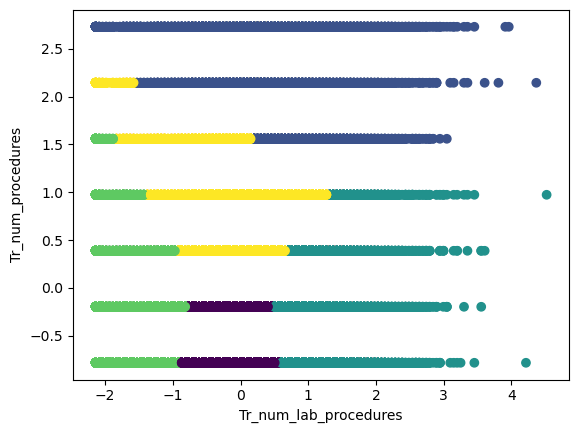

In [84]:
plt.scatter(x=k_clust_data['Tr_num_lab_procedures'],y=k_clust_data['Tr_num_procedures'], c=k_clust_data['kmeans5'])
plt.xlabel('Tr_num_lab_procedures')
plt.ylabel('Tr_num_procedures')

# Here we are able to visualize the differences of how procedures may effect the number of lab procedures done. 